In [12]:
import pandas as pd

url1 = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_2_regression_model/Exercise2BusData.csv'
df = pd.read_csv(url1)

# df = pd.read_csv('Exercise2BusData.csv')
# df.head(10)
# df.shape()
# df.info()


df = df.iloc[:1000]
df = df.drop(['Arrival_time','Stop_id','Bus_id','Line_id'], axis=1)

# corr_matrix = df.corr()
# corr_matrix['Arrival_delay'].sort_values(ascending=False)

x = df.drop(['Arrival_delay'], axis=1)
y = df['Arrival_delay']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
!pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 325.1 kB/s eta 0:06:25
   ---------------------------------------- 0.2/124.9 MB 1.5 MB/s eta 0:01:23
   ---------------------------------------- 0.5/124.9 MB 3.2 MB/s eta 0:00:39
   ---------------------------------------- 0.9/124.9 MB 4.6 MB/s eta 0:00:27
   ---------------------------------------- 1.2/124.9 MB 5.0 MB/s eta 0:00:25
   ---------------------------------------- 1.5/124.9 MB 5.5 MB/s eta 0:00:23
    --------------------------------------- 1.8/124.9 MB 5.8 MB/s eta 0:00:22
    --------------------------------------- 2.2/124.9 MB 6.0 MB/s eta 0:00:21
    --------------------------------------- 2.5/124.9 MB 6.2 MB/s eta 0:00:20
    --------------------------------------- 2.9/124.9 MB 6.3 MB/s eta 0:00:20
   - -------------------------------------- 3.2/124.9 MB 6.7 MB/s eta 0:00:1


[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# # Define a parameter grid for hyperparameter tuning
# param_grid = {
#     'eta': [0.05, 0.1, 0.3],
#     'max_depth': [1, 3, 6],
#     'gamma': [0, 0.05, 0.1, 0.3],
#     'min_child_weight': [1, 3, 5],
# }
#
# # Create the GridSearchCV object
# grid_search = GridSearchCV(xgb.XGBRegressor(), param_grid, cv=5, verbose=0)
#
#
# # Fit the grid search to the scaled training data
# grid_search.fit(X_train_scaled, y_train)
#
# # Get the best parameters
# best_params = grid_search.best_params_
#
# print("Best Parameters:", best_params)
# print("Best Score:", grid_search.best_score_)
#
# # Create an XGBoost model with the best parameters from the grid search
# best_XGB = xgb.XGBRegressor(eta=best_params['eta'], gamma=best_params['gamma'], max_depth=best_params['max_depth'],
#                             min_child_weight=best_params['min_child_weight'])

best_XGB = xgb.XGBRegressor(eta=0.1, gamma=0.05, max_depth=3, min_child_weight=1)
# best_XGB = xgb.XGBRegressor()
best_XGB.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.1, eval_metric=None,
             feature_types=None, gamma=0.05, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=1, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred = best_XGB.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# feature importance
print(best_XGB.feature_importances_)

Mean Absolute Error: 10.368645079731941
Mean Squared Error: 195.42632840165732
R-squared: 0.9921404123306274
[0.01225529 0.00401289 0.9815857  0.00214614]


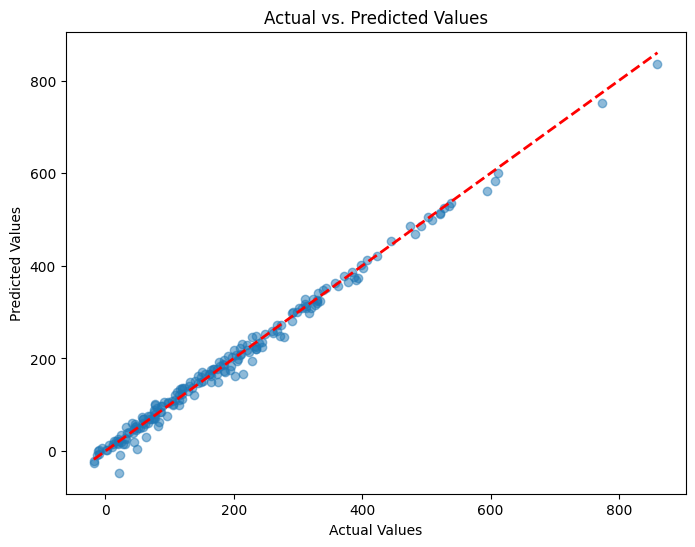

In [10]:
import matplotlib.pyplot as plt
# y_test contains the actual target values for the test dataset
# y_pred contains the predicted values for the test dataset

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)  # Plot actual vs. predicted values


# Add labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)

# Show the plot
plt.show()

In [11]:
# data from Skanstull
url2 = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_2_regression_model/Exercise2optional.csv'
df2 = pd.read_csv(url2)

df2 = df2.drop(['Arrival_time','Stop_id','Bus_id','Line_id'], axis=1)

x_sk = df.drop(['Arrival_delay'], axis=1)
y_sk = df['Arrival_delay']

y_sk_pred = best_XGB.predict(x_sk)

mae_sk = mean_absolute_error(y_sk, y_sk_pred)
mse_sk = mean_squared_error(y_sk, y_sk_pred)
r2_sk = r2_score(y_sk, y_sk_pred)
print(f"Mean Absolute Error in Skanstull: {mae_sk}")
print(f"Mean Squared Error in Skanstull: {mse_sk}")
print(f"R-squared in Skanstull: {r2_sk}")

Mean Absolute Error in Skanstull: 9.047248984321952
Mean Squared Error in Skanstull: 160.45127460997566
R-squared in Skanstull: 0.9947953820228577
